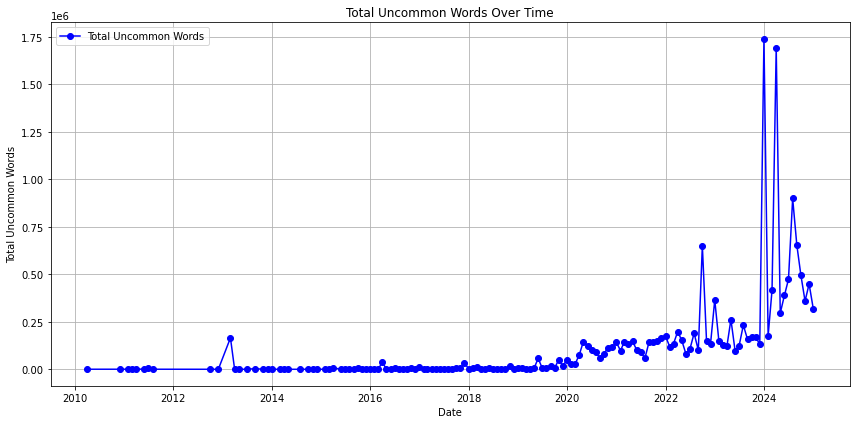

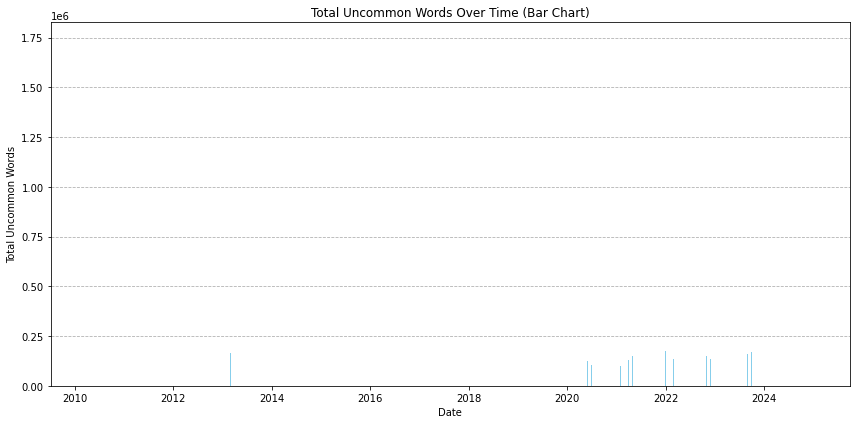

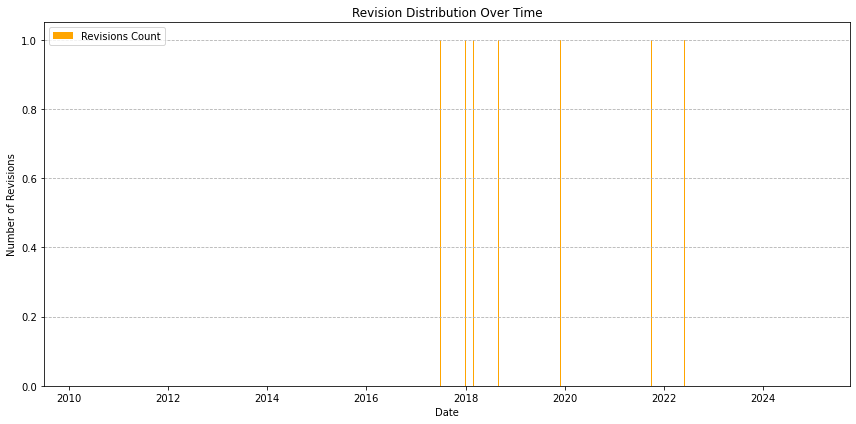

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to your JSON file
file_path = "aggregated_growth.json/part-00000-393139dd-c7bc-41d3-ad82-5168a641518c-c000.json"

# Load the JSON data into a pandas DataFrame
df = pd.read_json(file_path, lines=True)

# Combine `year` and `month` into a single datetime column
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')

# Sort the DataFrame by the date column
df = df.sort_values(by='date')

# Ensure the data types are consistent
df['total_uncommon_words'] = pd.to_numeric(df['total_uncommon_words'], errors='coerce')

# Plot Total Uncommon Words Over Time
plt.figure(figsize=(12, 6))
plt.plot(df['date'].values, df['total_uncommon_words'].values, marker='o', label='Total Uncommon Words', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Uncommon Words')
plt.title('Total Uncommon Words Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Bar Plot for Total Uncommon Words Over Time
plt.figure(figsize=(12, 6))
plt.bar(df['date'].values, df['total_uncommon_words'].values, color='skyblue', label='Total Uncommon Words')
plt.xlabel('Date')
plt.ylabel('Total Uncommon Words')
plt.title('Total Uncommon Words Over Time (Bar Chart)')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Group by Year-Month to get Revision Count
revision_distribution = df.groupby(['year', 'month']).size().reset_index(name='revision_count')

# Plot Revision Distribution Over Time
revision_distribution['date'] = pd.to_datetime(revision_distribution['year'].astype(str) + '-' + revision_distribution['month'].astype(str) + '-01')
plt.figure(figsize=(12, 6))
plt.bar(revision_distribution['date'], revision_distribution['revision_count'], color='orange', label='Revisions Count')
plt.xlabel('Date')
plt.ylabel('Number of Revisions')
plt.title('Revision Distribution Over Time')
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()



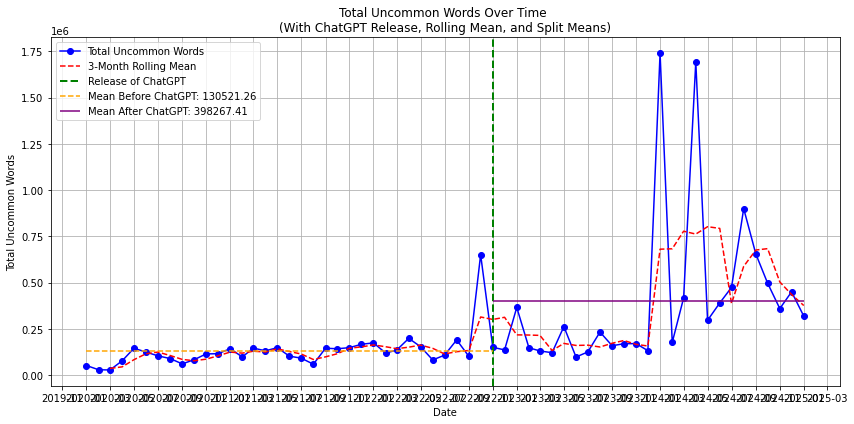

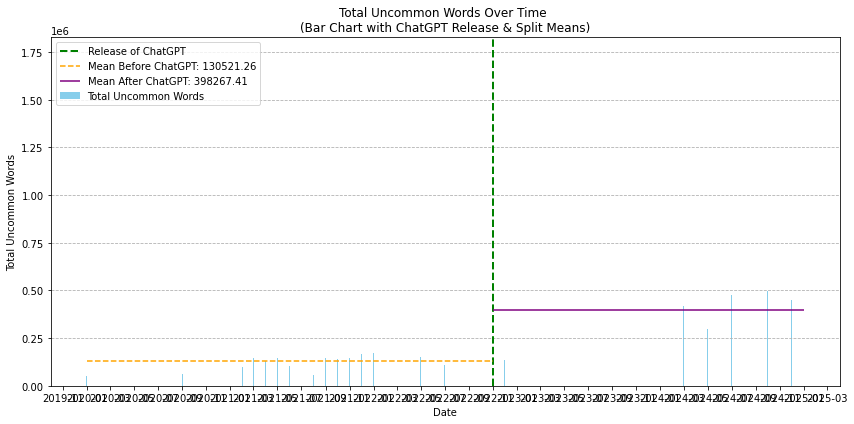

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Path to your JSON file
file_path = "aggregated_growth.json/part-00000-393139dd-c7bc-41d3-ad82-5168a641518c-c000.json"

# Load the JSON data into a pandas DataFrame
df = pd.read_json(file_path, lines=True)

# Combine `year` and `month` into a single datetime column
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')

# Filter out rows where the year is less than 2020
df = df[df['date'].dt.year >= 2020]

# Sort the DataFrame by the date column
df = df.sort_values(by='date')

# Ensure the data types are consistent
df['total_uncommon_words'] = pd.to_numeric(df['total_uncommon_words'], errors='coerce')

# Compute a rolling mean with a window size of 3 months
df['rolling_mean'] = df['total_uncommon_words'].rolling(window=3).mean()

# ChatGPT release date (Nov 2022)
chatgpt_release_date = pd.Timestamp('2022-11-01')

# ----------------------------------------------------
# 1. Split the data: Before & After ChatGPT
# ----------------------------------------------------
df_before = df[df['date'] < chatgpt_release_date]
df_after = df[df['date'] >= chatgpt_release_date]

# ----------------------------------------------------
# 2. Compute means for each subset
# ----------------------------------------------------
mean_before = df_before['total_uncommon_words'].mean()
mean_after = df_after['total_uncommon_words'].mean()

# ----------------------------------------------------
# 3. Convert relevant dates to numeric for hlines
# ----------------------------------------------------
xmin_before_num = mdates.date2num(df_before['date'].min()) if not df_before.empty else None
xmax_before_num = mdates.date2num(chatgpt_release_date)

xmin_after_num = mdates.date2num(chatgpt_release_date)
xmax_after_num = mdates.date2num(df_after['date'].max()) if not df_after.empty else None

# ====================================================
# =========== LINE PLOT WITH MEAN HLINES =============
# ====================================================
plt.figure(figsize=(12, 6))

# Plot total_uncommon_words over time
plt.plot(
    df['date'].values,
    df['total_uncommon_words'].values,
    marker='o',
    label='Total Uncommon Words',
    color='blue'
)

# Plot 3-month rolling mean
plt.plot(
    df['date'].values,
    df['rolling_mean'].values,
    label='3-Month Rolling Mean',
    color='red',
    linestyle='--'
)

# Vertical line for ChatGPT release
plt.axvline(
    x=chatgpt_release_date,
    color='green',
    linestyle='--',
    linewidth=2,
    label='Release of ChatGPT'
)

# ----------------------------------------------------
# 4. Draw horizontal lines for means: hlines
# ----------------------------------------------------
# Mean line before ChatGPT (only if df_before not empty)
if xmin_before_num is not None:
    plt.hlines(
        y=mean_before,
        xmin=xmin_before_num,
        xmax=xmax_before_num,
        color='orange',
        linestyle='--',
        label=f'Mean Before ChatGPT: {mean_before:.2f}'
    )

# Mean line after ChatGPT (only if df_after not empty)
if xmax_after_num is not None:
    plt.hlines(
        y=mean_after,
        xmin=xmin_after_num,
        xmax=xmax_after_num,
        color='purple',
        linestyle='-',
        label=f'Mean After ChatGPT: {mean_after:.2f}'
    )

# Configure the x-axis to handle dates nicely
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

plt.xlabel('Date')
plt.ylabel('Total Uncommon Words')
plt.title('Total Uncommon Words Over Time \n(With ChatGPT Release, Rolling Mean, and Split Means)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ====================================================
# ====== (Optional) BAR PLOT WITH MEAN HLINES ========
# ====================================================
plt.figure(figsize=(12, 6))

# Bar plot of total_uncommon_words
plt.bar(
    df['date'].values,
    df['total_uncommon_words'].values,
    color='skyblue',
    label='Total Uncommon Words'
)

# Vertical line for ChatGPT release
plt.axvline(
    x=chatgpt_release_date,
    color='green',
    linestyle='--',
    linewidth=2,
    label='Release of ChatGPT'
)

# Horizontal lines for means
if xmin_before_num is not None:
    plt.hlines(
        y=mean_before,
        xmin=xmin_before_num,
        xmax=xmax_before_num,
        color='orange',
        linestyle='--',
        label=f'Mean Before ChatGPT: {mean_before:.2f}'
    )

if xmax_after_num is not None:
    plt.hlines(
        y=mean_after,
        xmin=xmin_after_num,
        xmax=xmax_after_num,
        color='purple',
        linestyle='-',
        label=f'Mean After ChatGPT: {mean_after:.2f}'
    )

# Configure the x-axis for dates
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

plt.xlabel('Date')
plt.ylabel('Total Uncommon Words')
plt.title('Total Uncommon Words Over Time \n(Bar Chart with ChatGPT Release & Split Means)')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()




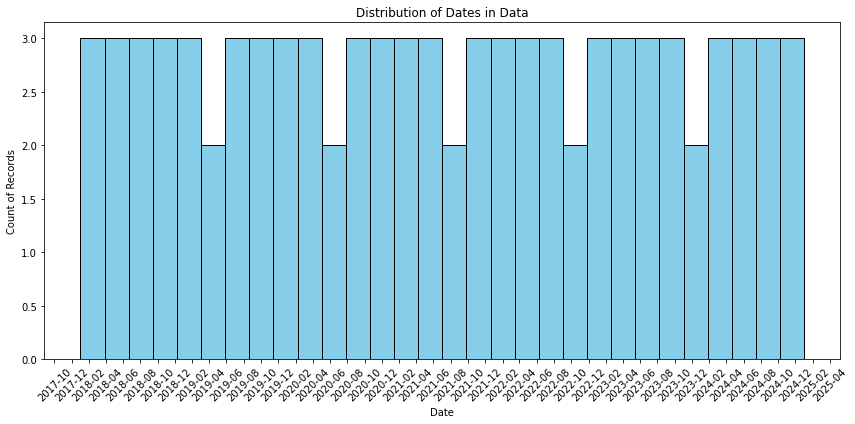

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Path to your JSON file
file_path = "aggregated_growth.json/part-00000-393139dd-c7bc-41d3-ad82-5168a641518c-c000.json"

# Load the JSON data into a pandas DataFrame
df = pd.read_json(file_path, lines=True)

# Combine `year` and `month` into a single datetime column
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')

# Optional: Filter out rows where the year is less than 2018
df = df[df['date'].dt.year >= 2018]

# Sort the DataFrame by date column
df = df.sort_values(by='date')

# ---------------------------------------------------
# Create Histogram of 'date' Distribution
# ---------------------------------------------------
plt.figure(figsize=(12, 6))

# Histogram directly on the 'date' Series
plt.hist(df['date'], bins=30, color='skyblue', edgecolor='black')

# Format the x-axis ticks as dates
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))   # Show year-month
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))   # Tick every 2 months (adjust as desired)
plt.xticks(rotation=45)  # Rotate date labels for readability

plt.title('Distribution of Dates in Data')
plt.xlabel('Date')
plt.ylabel('Count of Records')
plt.tight_layout()
plt.show()
